## Performing Analysis of Meteorological Data

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
Data = pd.read_csv('weatherHistory.csv')

In [101]:
Data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [102]:
Data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


#### Cleaning Dataset

In [103]:
col_req = ["Formatted Date", "Apparent Temperature (C)", "Humidity"]
Data = Data[col_req]
Data.head()

,Formatted Date,Apparent Temperature (C),Humidity
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83


In [104]:
Data['Formatted Date'] = pd.to_datetime(Data['Formatted Date'], utc = True)
Data = Data.set_index('Formatted Date')
fdata = Data[['Apparent Temperature (C)', 'Humidity']].resample('MS').mean()
fdata.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


### Plotting of Data

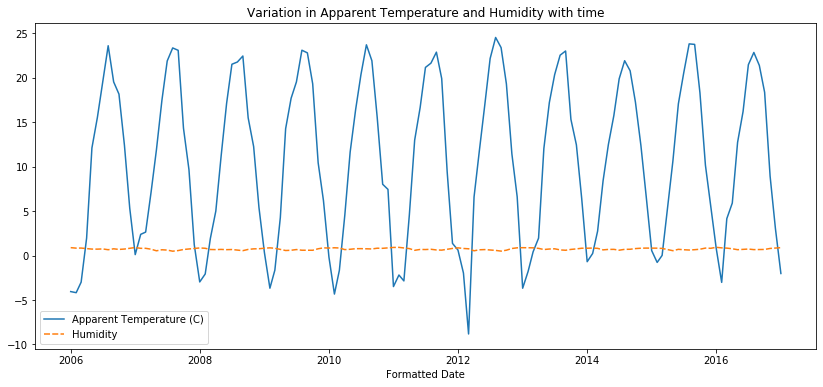

In [105]:
import seaborn as sns

import warnings

warnings.filterwarnings ("ignore") 
plt.figure (figsize=(14,6))

plt.title ("Variation in Apparent Temperature and Humidity with time")
sns. lineplot (data=df2)

In [106]:
df3 = df2[df2.index.month==4] 
print (df3) 
df3.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-04-30 00:00:00+00:00                 12.098827  0.728625
2007-04-30 00:00:00+00:00                 11.894421  0.536361
2008-04-30 00:00:00+00:00                 11.183688  0.693194
2009-04-30 00:00:00+00:00                 14.267076  0.567847
2010-04-30 00:00:00+00:00                 11.639406  0.706875
2011-04-30 00:00:00+00:00                 12.978997  0.591625
2012-04-30 00:00:00+00:00                 11.782770  0.650222
2013-04-30 00:00:00+00:00                 12.045563  0.677667
2014-04-30 00:00:00+00:00                 12.486181  0.691403
2015-04-30 00:00:00+00:00                 10.632801  0.547764
2016-04-30 00:00:00+00:00                 12.731427  0.659972


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

### January:

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

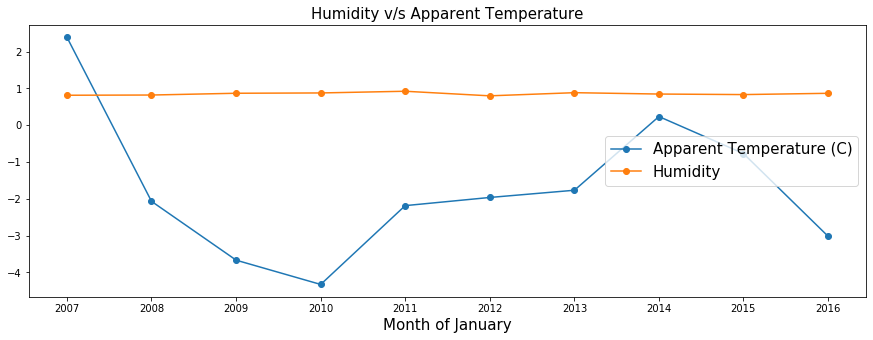

In [107]:
jan = fdata[fdata.index.month==1]
plt.figure(figsize=(15,5))
plt.plot(jan.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-', 
        label='Apparent Temperature (C)')
plt.plot(jan.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-', label='Humidity')
plt.legend(loc = 'center right', fontsize = 15);
plt.xlabel('Month of January', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

### February:

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

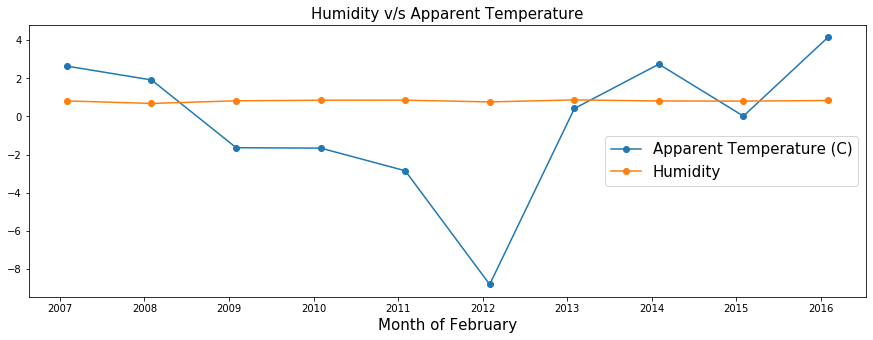

In [109]:
Feb = fdata[fdata.index.month==2]
plt.figure(figsize=(15,5))
plt.plot(Feb.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-', 
        label='Apparent Temperature (C)')
plt.plot(Feb.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-', label='Humidity')
plt.legend(loc = 'center right', fontsize = 15);
plt.xlabel('Month of February', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

### March:

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

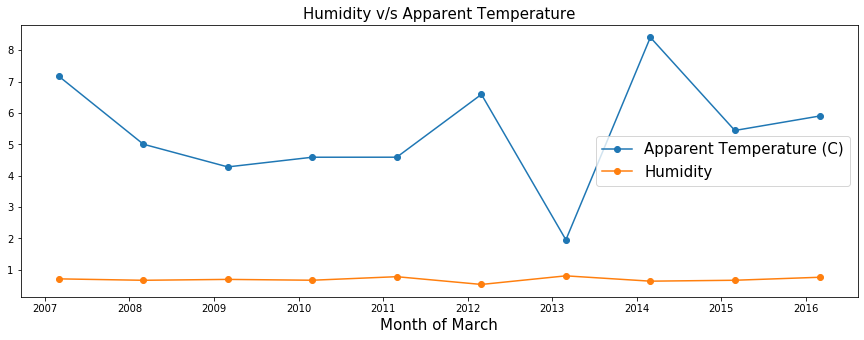

In [110]:
March = fdata[fdata.index.month==3]
plt.figure(figsize=(15,5))
plt.plot(March.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-', 
        label='Apparent Temperature (C)')
plt.plot(March.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-', label='Humidity')
plt.legend(loc = 'center right', fontsize = 15);
plt.xlabel('Month of March', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

### April:

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

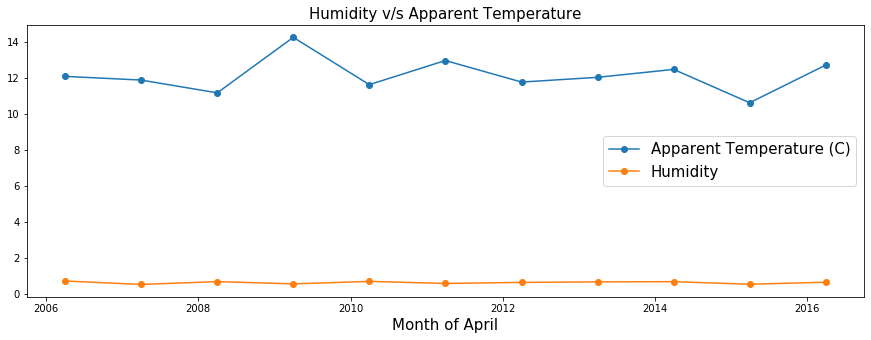

In [111]:
April = fdata[fdata.index.month==4]
plt.figure(figsize=(15,5))
plt.plot(April.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-', 
        label='Apparent Temperature (C)')
plt.plot(April.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-', label='Humidity')
plt.legend(loc = 'center right', fontsize = 15);
plt.xlabel('Month of April', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

### May:

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

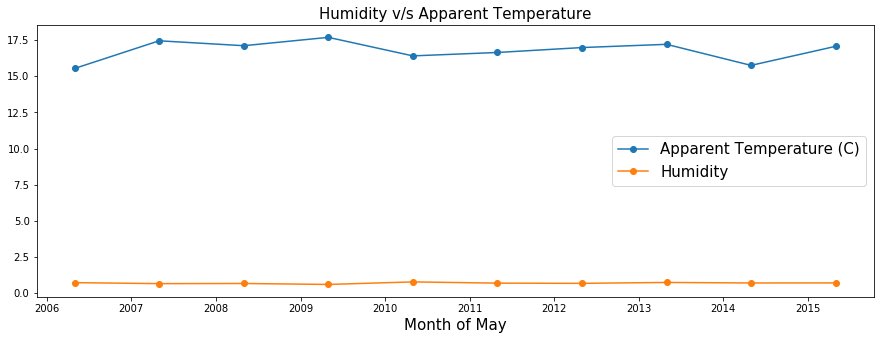

In [113]:
May = fdata[fdata.index.month==5]
plt.figure(figsize=(15,5))
plt.plot(May.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-', 
        label='Apparent Temperature (C)')
plt.plot(May.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-', label='Humidity')
plt.legend(loc = 'center right', fontsize = 15);
plt.xlabel('Month of May', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

### June:

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

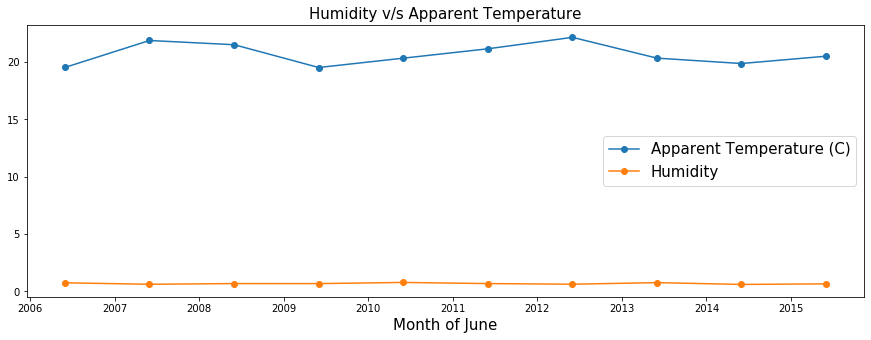

In [115]:
June = fdata[fdata.index.month==6]
plt.figure(figsize=(15,5))
plt.plot(June.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-', 
        label='Apparent Temperature (C)')
plt.plot(June.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-', label='Humidity')
plt.legend(loc = 'center right', fontsize = 15);
plt.xlabel('Month of June', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

### July:

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

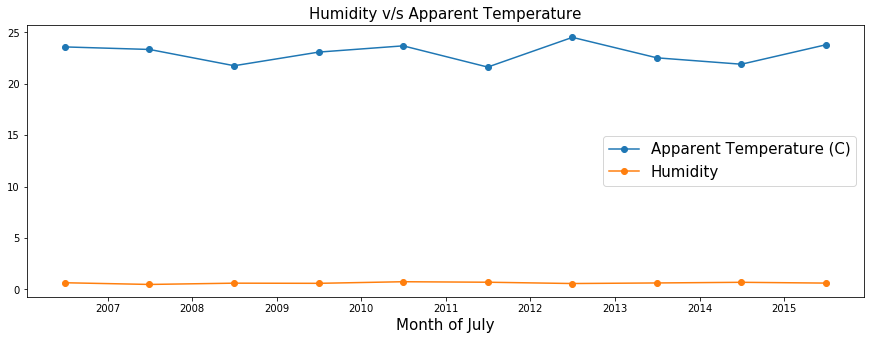

In [117]:
July = fdata[fdata.index.month==7]
plt.figure(figsize=(15,5))
plt.plot(July.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-', 
        label='Apparent Temperature (C)')
plt.plot(July.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-', label='Humidity')
plt.legend(loc = 'center right', fontsize = 15);
plt.xlabel('Month of July', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

### August:

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

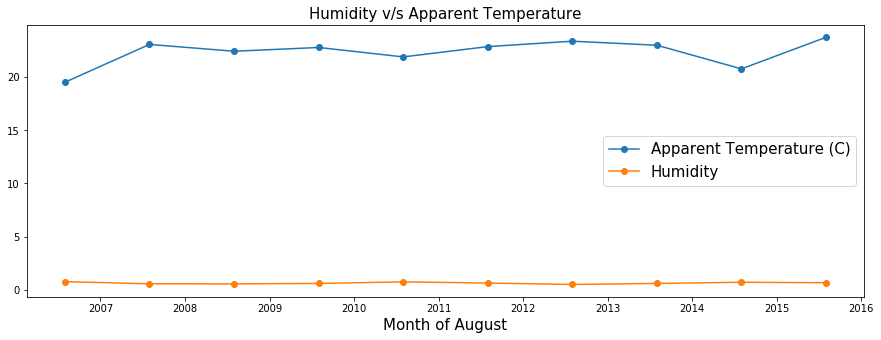

In [118]:
Aug = fdata[fdata.index.month==8]
plt.figure(figsize=(15,5))
plt.plot(Aug.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-', 
        label='Apparent Temperature (C)')
plt.plot(Aug.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-', label='Humidity')
plt.legend(loc = 'center right', fontsize = 15);
plt.xlabel('Month of August', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

### September:

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

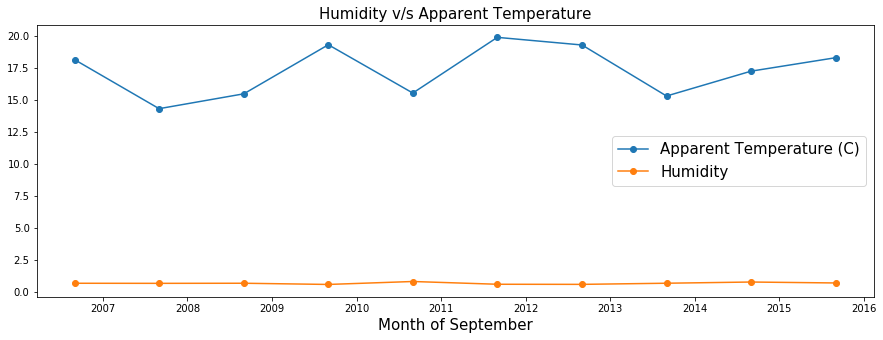

In [119]:
Sep = fdata[fdata.index.month==9]
plt.figure(figsize=(15,5))
plt.plot(Sep.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-', 
        label='Apparent Temperature (C)')
plt.plot(Sep.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-', label='Humidity')
plt.legend(loc = 'center right', fontsize = 15);
plt.xlabel('Month of September', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

### October:

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

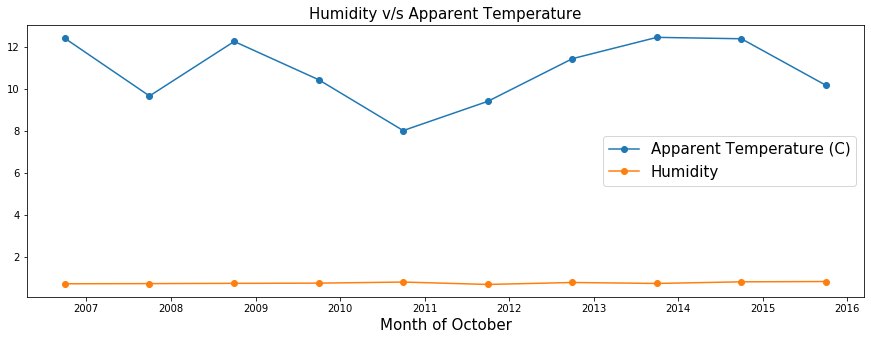

In [125]:
Oct = fdata[fdata.index.month==10]
plt.figure(figsize=(15,5))
plt.plot(Oct.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-', 
        label='Apparent Temperature (C)')
plt.plot(Oct.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-', label='Humidity')
plt.legend(loc = 'center right', fontsize = 15);
plt.xlabel('Month of October', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

### November:

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

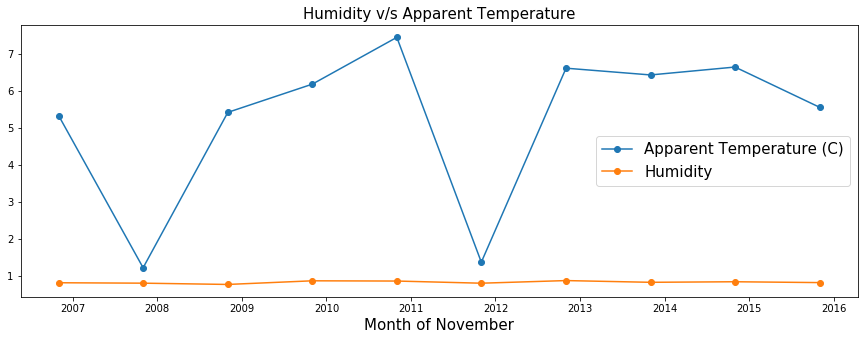

In [123]:
Nov = fdata[fdata.index.month==11]
plt.figure(figsize=(15,5))
plt.plot(Nov.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-', 
        label='Apparent Temperature (C)')
plt.plot(Nov.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-', label='Humidity')
plt.legend(loc = 'center right', fontsize = 15);
plt.xlabel('Month of November', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

### December:

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

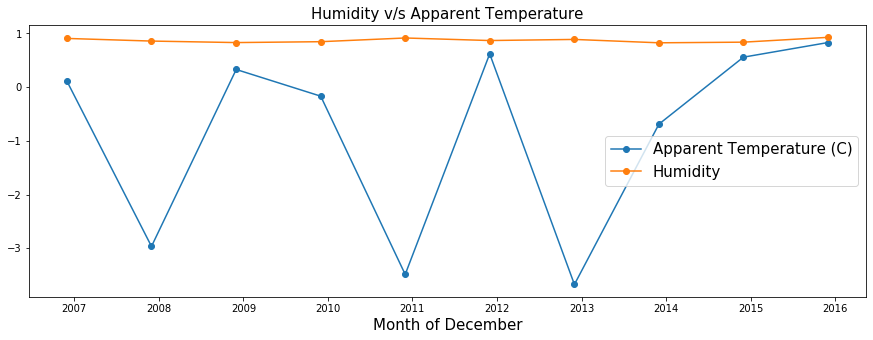

In [124]:
Dec = fdata[fdata.index.month==12]
plt.figure(figsize=(15,5))
plt.plot(Dec.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-', 
        label='Apparent Temperature (C)')
plt.plot(Dec.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-', label='Humidity')
plt.legend(loc = 'center right', fontsize = 15);
plt.xlabel('Month of December', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)